# Bayesian Neural Networks

## Introduction

For this chapter we need some background knowledge of basic bayesian statistics as well as deep learning. For Deep Learning you might want to check out the introductory book by {cite}`Goodfellow-et-al-2016` which is [available online](https://www.deeplearningbook.org/) or the book by  {cite}`zhang2023dive` which is [also available online](https://d2l.ai/) and provides additional code examples.
For an introduction of Bayesian Statistics the book by {cite}`robert_monte_2004` provides more than is needed and is a classical texbook. You might also want to check out the book by {cite}`johnson2022bayes` which has an [online version](https://www.bayesrulesbook.com/) as well. The paper by {cite}`Jospin_2022` provides an introduction to the specifics of Bayesian Neural Nets (BNN), assuming some knowledge in Neural Networks. To start with recall bayes formula:


$$
\underbrace{p(h|\mathcal{D})}_{Posterior} = \frac{\overbrace{p(h)}^{Prior} \cdot \overbrace{p(\mathcal{D}|h)}^{Likelihood}}{\underbrace{p(\mathcal{D})}_{Evidence/Marginal}}
$$
Also recall that in a bayesian setting we do not assume an unknown but fixed parameter but instead a distribution over our parmeter(s) of interest. For Neural networks our hypothesis consists of a network architecture including weights, activations bias etc. but for know let us fix the overall architecture and let us consider the case of simple Feed Forward Neural Networks (FNN) where we know that a FNN corresponds mathematically to some composition of functions that transfors some input $\bf{x}$ to an output $\hat{y}$ according to 

$\hat{y} = f_{k} \circ f_{k-1} \circ f_{1} \circ ( {\bf{x}} )= f_{k}(f_{k-1}( \dotsm (f_{1}( {\bf{x}} ))) := \psi( {\bf{x}})$ for ${\bf{x}} \in \mathcal{X}$ and $\hat{y} \in \mathcal{Y}$. 

Typically this function is parametrized by some parameters ${\bf{\theta}}$. To indicate this one can write more precisely $\phi_{ \bf{\theta} }( {\bf{x}} )$ (where subscript notation is used in order avoid notation for bayesian conditioning). For Neural Networks these parameters are the weights and biases.Instead of assuming a fixed scalar quantity for each bias and weight term we assume a realization from some distribution in spirit of the bayesian paradigm, e.g. if we denote the weights between unit i and j with $w_{i,j}$ we assume $w_{i,j} \sim G_{i,j}$ for some distribution $G_{i,j}$ (the analog holds for the bias term as well). Note that instead of this "weight space view" one could also take a "function space view" and instead assume $\hat{y} = y + \epsilon$ where the outcome $\hat{y}$ is a random variable according to the distribution of $\epsilon$. Also note that one could impose a probability distribution on the activations instead of the weights, altough a connection exists (see {cite}`Jospin_2022` p. 6).
Reformulation Bayes Rule in our weight notation we get:

$$
\underbrace{p({\bf{w}} |\mathcal{D})}_{\sim epistemic} = \frac{p( {\bf{w}} ) \cdot \overbrace{p(\mathcal{D}| {\bf{w}} )}^{\sim aleatoric}}{p(\mathcal{D})}
$$

Choosing an appropriate posterior distribution can be difficult and there is still debate on how to choose an appropriate one. Typically a Gaussian is common choice for BNNs due to desirable asymptotic properties (see  the introcutiory chapter of {cite}`neal1996`).
The *aleatoric* uncertainity is associated with the likelihood since it captures the inherint noise associated with incomplete data we have. The *epistemic* uncertainity is represented by the posterior distribution (which will be more peaked as we get more sample data and thereby reducing its uncertainty in terms of "how spreaded" the distribution is).
To calculate the posterior we need to compute the evidence, which involves integration over a (typically) high dimensional distribution. To be more precise to calculate our evidence we have that:

$$
p(\mathcal{D}) = \int_{W}p(\mathcal{D} \lvert {\bf{w}} )p({\bf{w}})d\bf{w}
$$

Where we integrate of the whole multidemensional space of all weights ${\mathcal{W}}$. Typically this is only tractable for small dimensions. For BNNs two mayor approaches exists: the first one is based on Markov Chain Monte Carlo (MCMC) methods which provides asymptotically exact results (for proper specified transition kernels), the other one is based on Variational Methods which restates the integration as an optimization problem for some variational distribution which depends itsef on certain parameters and is only an approximation. For (more than) an introduction to MCMC methods the book by {cite}`robert_monte_2004` can be consulted.

Note that posterior refers to the underlying parameters, here the weights (and biases), and not to the actual variable of interest. But rather the posterior is typically used in a next to compute the **posterior predictive distribution**:

$$\mathbb{P}(Y^{\prime}|\mathcal{D}) = \int_{\mathcal{W}}\mathbb{P}(Y^{\prime}|{\bf w}) \underbrace{\mathbb{P}({\bf w}|\mathcal{D})}_{\text{posterior}}d {\bf w}$$

One can see that the prior predictive distribution weights the posterior by the probability of observing $Y^{\prime}$ over all weights in our weight space $\mathcal{W}$

Having calulated the posterior distribution, assessing *epistemic* uncertainty can the be performed by drawing samples from the posterior distribution and by analyzing the posterior distribution itself.

Since weights and biases are random variables, training a neural network is now somewhat different. Following the notation of {cite}`Jospin_2022`(p.3) with minor adjustments the training, or inference step as it is also called, can be stated in the following pseudocode of {prf:ref}`BNN`. Typically gaussian distributions are used for priors due to easy computation and desirable asymptotic properties (see {cite}`Jospin_2022`(p. XYZ)). In the first step the posterior is computetd which is a computationally hard problem due to the highdimensional integration required for the marginal distribution in the denominator. The returned predictions $\bf\hat{y}$ are drawn from the marginal distribution $ p({\bf{y}} \vert {\bf{w}}, \mathcal{D}) $ and the weights $\bf{w}$ are drawn from the posterior distribution $ p({\bf{w}} \vert \mathcal{D}) $. 

```{prf:algorithm} BNN Inference with stochastic weights and biases[^bnn]
:label: BNN

**Require:** prior distribution $p( {\bf{w}} )$, Likelihood $p(\mathcal{D} \lvert {\bf w}), Data \{{\bf{x}}_{i}\}_{i=1}^{N}$

1. Compute $p(\bf{w}|\mathcal{D}) = \frac{p( {\bf{w}}) \cdot p(\mathcal{D}|{\bf{w}})}{p(\mathcal{D})}$
2. For i=0 to N do:
	i. Draw $ {\bf{w}}_{i} \sim p( {\bf{w}} \vert \mathcal{D}) $
	ii. $ \hat{y}_{i} = \phi_{{\bf{\theta}_{i}}}({\bf{x})} $


3. Return $\{\hat{y}_{i}\}_{i=1}^{N}, {\bf{w}}_{i=1}^{N}$
```

Since $\{{\bf{y}}_{i} \}_{i=1}^{N}$ are draws from some distribution the end resut is not a single (best) prediction but rather a distribution over possible predictions. To get a single prediction one can take the value with highest probability, e.g. the Maximum aposteriori prediction (MAP). In addition to that we can quantify the (epistemic) uncertainty associated with this prediction by inspecting the marginal distribution $p({\bf{y}} \vert {\bf{w}}, \mathcal{D} )$, for example we could calculate the estimated variance of our point predictor. <br>
In the following we will consider (again) the wine and diabetes data we encounterd before. We will implement our bayesian neural networks using `pymc`:

## Markov Chain Monte Carlo Methods

Our aim is to take sample from the posterior distribution but as was pointed out above computation can be hard, especially if we are in the unlucky and more realistic case of no conjugancy. The idea of MCMC is to draw samples from a sequence of random variables that will asymptotically converege to the desired distribution und certain conditions. This sequence is called a Markov Chain:

````{prf:Markov Chain Definition}
:label: mc-def
Let $S:=X_{1},X_{2},...$ be a sequence of random variables.
$S$ is called a Markov Chain if $\mathbb{P}(X_{i}|X_{1},X_{2},..X_{i-1}) = \mathbb{P}(X_{i}|X_{i-1})$ $\forall$ $i$ $\in$ $\{2,3,...\}$

- $\mathbb{P}(X_{1})$ is called the **initial distribution**.
- $\mathbb{P}(X_{i}|X_{i-1})$ is called the **transition probability distribution**.
- The support of $X_{i}$'s is called the **state space** of the Markov Chain
````

A Markov Chain can have certain important properties which are stated below. A tourough treatment can be found in {cite}`robert_monte_2004` on page 207 onwards.
- **Stationarity**: $\forall k,i$ $\in$ $\{1,2,..\}$, the sequence $(X_{i+1},...,X_{i+k})$ does not depend on the choice of $i$.
- **Reversibility**: The distribution of pairs $(X_{i}, X_{i+1})$ from $S$ is exchangeable.
- **Recurrence**: Each state $\mathcal{A}$ will be reached an infinite amount of times in expectation.
  
Reversibility implies Stationarity which ensures that for some $i$ we can make the claim that if $X_{i}$ has a certain distribution, say $\pi$ the so does $X_{i+1}$, e.g. $X_{i+1} \sim \pi$ (the stationary distribution is therefore also the limiting distribution). An import choice for achieving this is to select a suitable transition probability (also called Kernel). Especially if the Kernel is *irreducible* (roughly speaking all possible states can be reached in finite steps) stationarity can be concluded. Often irredudubability ensures Reccurrence. One of the most prominent versions of MCMC sampling is the Metropolis Hastings algorithms:

```{prf:algorithm} Metropolis Hastings
:label: MH-algo

**Inputs** Given initial value $X^{0}$, target distribution $f$, Kernel $q$

**Output** Sequence of RV $(X^{n}, X^{n+1},...)

1. Until convergence criterion met:
2. Draw $Y_{t}$ from $q(y|x^{(t)})$

	2.1 Calculate acceptance probability $\alpha(x,y) := \min{1, \frac{f(y) \times q(x|y)}{f(x) \times q(y|x)}}$
    2.3 Drawn random uniform number $u \sim U(0,1)$
	2.2 If \alpha \greq u$
        Set $X^{(t+1)} = Y_{t}$
    2.5. Else
        X^{(t+1)} = x^{(t)}

Altough for Metropolis Hasting algorithms convergence guarantees can be shown a typical issue is convergence speed since it might just take too long until we get results. Hamiltonian MCMC methods and adaptions thereof like the NUTS-Sampler try to solve this issue and are presented briefly. For a more tourough treatment and related literature one can read into the STAN user manual which is [available online](https://mc-stan.org/docs/reference-manual/mcmc.html).
The idea of Hamiltonian MCMC is to introduce a momentum variable $\rho$. If we denote the posterior distribution of parameters $\theta$ and momentum by $p(\theta)$ we can write the negative logarithm as $p(\rho, \theta) = p(\rho|\theta) p(\theta) = T(\rho|\theta) + V(\theta)$ by using logarithm laws and proper definition of $T$ and $V$. For some given initial value of $\theta$ a simultaneous update for $\theta$ and $\rho$ can be phrased as a system of two differential equations which can be solved using the leapfrog algorithm, which requires a discretization step $\epsilon$ and a stepsize $L$ as input. Due to possible numerical errors in this step the newly calculated values of $\rho$ and $\theta$ are accepted with a certain probability only similar to the MH algorithm above. The idea of the NUTS-sampler now is to adaptively set $\epsilon$ and $L$ in each iteration, typically handled differently in an early warm-up phase and thereafter leading to faster convergence results.

With this knowledge let us start implementing. Programming with expressions involing random variables and drawing from those can be achived by *probabilistic programming languages*. Here we are using `PyMc`. As an example we use the wine dataset encountered previously.

In [37]:
import numpy as np
import pandas as pd
import torch
import pymc as pm
import pytensor

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import arviz as az

In [38]:
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.15.1


In [39]:
# set general parameters
SEED = 123
torch.manual_seed(SEED)
np.random.seed(SEED)
rng = np.random.default_rng(SEED)
torch.set_default_dtype(torch.float64)
sns.set_style("whitegrid")
mpl.rcParams['figure.figsize'] = (5, 3)
floatX = pytensor.config.floatX

In [40]:
X_wine, y_wine = load_wine(return_X_y = True)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine,
                                                                        test_size=1,
                                                                        random_state = SEED)

Here again we define the Wine and Diabetes model we encountered in the Deep Ensemble chapter. We will need the learned weights to specifiy the expected values for our distributions.

In [41]:
{
    "tags": [
        "hide-input",
    ]
}
class WineModel(torch.nn.Module):
    def __init__(self):
        super(WineModel, self).__init__()
        self.fc1 = torch.nn.Linear(X_train_wine.shape[1], 30)
        self.fc2 = torch.nn.Linear(30, 20)
        self.fc3 = torch.nn.Linear(20, 3, bias = False)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

def train_model(nn, X_train, y_train, classification = True, n_epochs = 800, bootstrap = True, boot_size = 0.75):
    """
    Train a singe DNN.
    """

    # create boostrap sample
    if bootstrap:
        assert boot_size > 0 and boot_size < 1
        idx = np.arange(X_train.shape[0])
        n_boot = int(np.ceil(int(boot_size * len(idx))))
        idx_boot = np.random.choice(idpredict_modelx, size = n_boot, replace=False)
        X_train = X_train[idx_boot]
        y_train = y_train[idx_boot]

    X_train = torch.from_numpy(X_train)
    y_train = torch.from_numpy(y_train)
    
    learning_rate = 0.001
    
    if classification:
        criterion = torch.nn.CrossEntropyLoss()
    else:
        criterion = torch.nn.MSELoss()
        y_train = y_train.unsqueeze(1)
        
    optimizer = torch.optim.Adam(nn.parameters(), lr=learning_rate)

    # train for n_epochs
    acc_loss = []
    for epoch in range(n_epochs):
        nn.train()
    
        # Forward pass
        outputs = nn(X_train)
        loss = criterion(outputs, y_train)
        acc_loss.append(loss.detach().item())
    
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return acc_loss
    
def predict_model(model, X_test, classification = True):
    X_test = torch.from_numpy(X_test)
    model.eval()
    with torch.no_grad():
        pred = model(X_test).numpy()
        if classification:
           pred = pred.argmax(axis = 1)
    return pred

In [42]:
nn_wine = WineModel()
loss_wine = train_model(nn_wine, X_train_wine, y_train_wine, bootstrap = False)
wine_train_preds = predict_model(nn_wine, X_train_wine)

Just for a sanity check, let us see whether we did actually sucessfully learn on the data with these models:

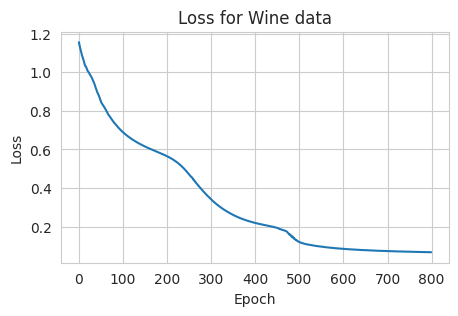

In [43]:
{
    "tags": [
        "hide-input",
    ]
}

plt.plot(loss_wine)
plt.title("Loss for Wine data")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

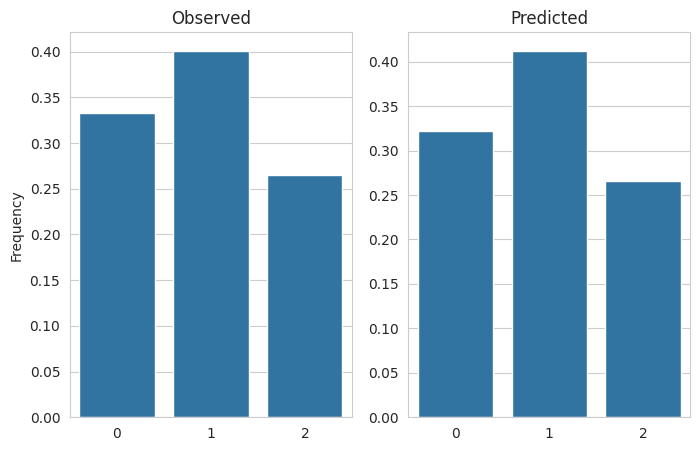

In [44]:
{
    "tags": [
        "hide-input",
    ]
}

fix, ax = plt.subplots(1,2, figsize = (8,5))

_, counts = np.unique(y_train_wine, return_counts = True)
counts = counts / sum(counts)
sns.barplot(counts, ax = ax[0])
ax[0].set_ylabel("Frequency")
ax[0].set_title("Observed")
_, counts = np.unique(wine_train_preds, return_counts = True)
counts = counts / sum(counts)
sns.barplot(counts, ax = ax[1])
ax[1].set_title("Predicted")
plt.show()

We will store the learned parameters in the variables 'wine_state' and 'diabetes_state'.

In [45]:
wine_state = nn_wine.state_dict()

 Now we are ready to implement our 'bayesianized' neural networks. Let us first consider the wine case:

In [46]:
coords_wine = {
    "h_1": np.arange(wine_state["fc1.weight"].shape[0]),
    "h_2": np.arange(wine_state["fc2.weight"].shape[0]),
    "h_3": np.arange(wine_state["fc3.weight"].shape[0]),
    "train_cols": np.arange(X_train_wine.shape[1]),
    "obs_id": np.arange(X_train_wine.shape[0])
}

In [47]:
scale = 0.05
with pm.Model(coords = coords_wine) as bnn_wine:

    ann_input = pm.Data("ann_input", X_train_wine, dims = ("obs_id", "train_cols"))
    ann_output = pm.Data("ann_output", y_train_wine, dims = "obs_id")

    # set expected value and variance for normals
    # each entry of weight matrix is a normal, no correlation
    mu_w_1 = wine_state["fc1.weight"].T.numpy()
    mu_b_1 = wine_state["fc1.bias"].numpy()
    sigma_w_1 = np.ones(mu_w_1.shape) * scale
    sigma_b_1 = np.ones(mu_b_1.shape) * scale

    mu_w_2 = wine_state["fc2.weight"].T.numpy()
    mu_b_2 = wine_state["fc2.bias"].numpy()
    sigma_w_2 = np.ones(mu_w_2.shape) * scale
    sigma_b_2 = np.ones(mu_b_2.shape) * scale

    mu_w_3 = wine_state["fc3.weight"].T.numpy()
    sigma_w_3 = np.ones(mu_w_3.shape) * scale

    # create normal distributed weights and biases
    w_1 = pm.Normal("w_1", mu_w_1, sigma_w_1, dims = ("train_cols", "h_1"))
    b_1 = pm.Normal("b_1", mu_b_1, sigma_b_1, dims = "h_1")
    w_2 = pm.Normal("w_2", mu_w_2, sigma_w_2, dims = ("h_1", "h_2"))
    b_2 = pm.Normal("b_2", mu_b_2, sigma_b_2, dims = "h_2")
    w_3 = pm.Normal("w_3", mu_w_3, sigma_w_3, dims = ("h_2", "h_3"))


    act_1 = pm.Deterministic("act_1", pm.math.tanh(pm.math.dot(ann_input, w_1) + b_1))
    act_2 = pm.Deterministic("act_2", pm.math.tanh(pm.math.dot(act_1, w_2) + b_2))
    act_3 = pm.Deterministic("act_3", pm.math.softmax(pm.math.dot(act_2, w_3), 1))

    out = pm.Categorical("out",act_3, observed = ann_output, dims = "obs_id")
    

We can also make use of the `arviz` package and visualize the conceptual setup of our model in so called plate notation (explanation below):

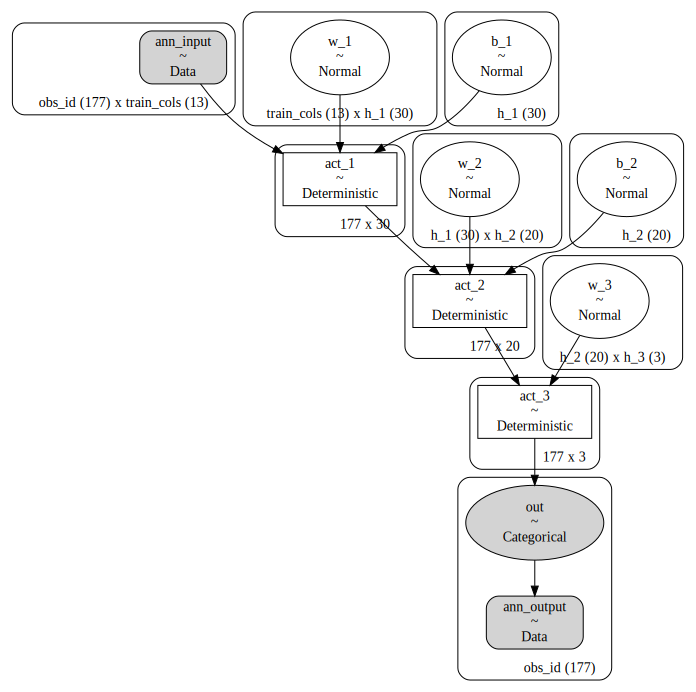

In [48]:
pm.model_to_graphviz(bnn_wine)

Each 'plate' indicates a repetition of data. Since we have 177 training observations we have 177 repetitions. A round circle represents a latent random variable which is unobserved, a grey circle an observed random variable. In our case the output and input data and the Likelihood which is specified as 'Categorical', a more or less broad definition of a categorical variable provided within pymc. Finally the rectangles show a deterministic operation, in our case the activation functions.

Having specified our destributional assumptions on our weights and biases we can take some samples:

In [49]:
with bnn_wine:
    trace = pm.sample(500)
    # by convention the created inference data is often called trace or idata (sorthand for 'inference data')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w_1, b_1, w_2, b_2, w_3]


Output()

Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 169 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


There are several things to notice. First, by default the *NUTS-sampler* is used.<br> Second, notice that the computation did actually take quite some time, considering we have a fairly small model. Also we draw 4 times a sample sequence, a common choice in MCMC setting for diagnostic reasons. Now lets take a look at the result. For simplicity only the bias terms are shown since we have too many weights in each layer to get a clear picture that is not too cluttered:

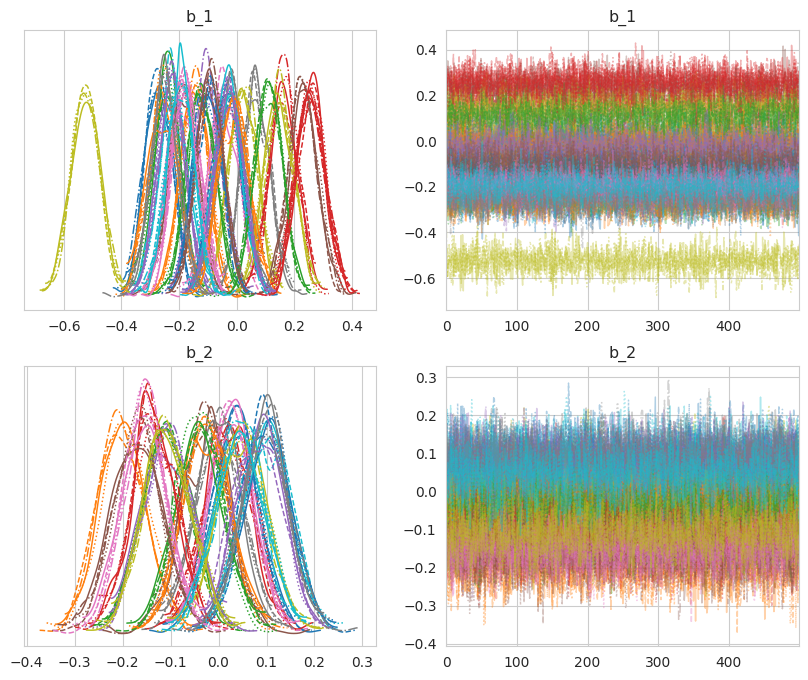

In [50]:
_ = az.plot_trace(trace, var_names= ["b_1", "b_2"], figsize=(10, 8))

What we see is what we would expect: each bias term is norally distributed with mean given by the previously trained model and some given variance (which is the same for all bias terms).<br>
On the right side we can see the realizations of each draw for each bias term. Since we do not see any autocorrelation and for each bias term it appears to be a random draw around its mean so we do not go any deeper in diagnositic checks that would be typically done in MCMC methods.
Next we can calculate *posterior predictive* quantitites based on our posterior distribution over the weights and biases:

In [51]:
with bnn_wine:
    ppc = pm.sample_posterior_predictive(trace)
    trace.extend(ppc)

Sampling: [out]


Output()

If we did set up the mean values for our weights corecctly the posterior predictive distribution should resemble the actual distribution in our training data since (since our model predicted fairly well).

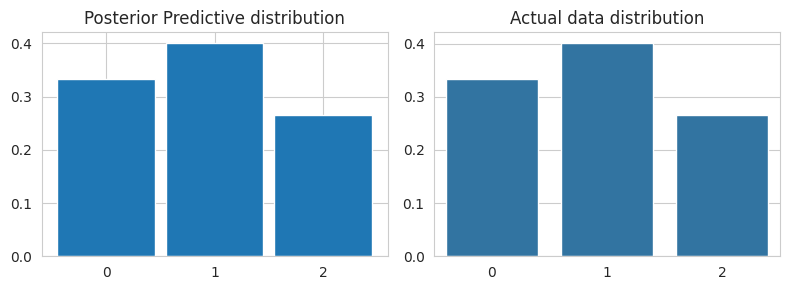

In [52]:
{
    "tags": [
        "hide-input",
    ]
}

fig, ax = plt.subplots(1,2, figsize=(8, 3))
az.plot_dist(trace.posterior_predictive["out"], kind = "hist", ax = ax[0])
ax[0].set_title("Posterior Predictive distribution")
_, counts = np.unique(y_train_wine, return_counts = True)
counts = counts / sum(counts)
sns.barplot(counts, ax = ax[1])
ax[1].set_title("Actual data distribution")
plt.tight_layout()
plt.show()

To further stress the point that we are actually facing a distribution over predicted values and not a single prediction let us consider an two datapoints: An hitherto unobserved test point and the first encountered training point.

In [53]:
{
    "tags": [
        "hide-input",
    ]
}
print(f"Actual class test data point:      {y_test_wine}")
print(f"Predicted class: test data point:  {predict_model(nn_wine, X_test_wine)}")
print(f"Actual class first training point: {y_train_wine[0]}")

Actual class test data point:      [2]
Predicted class: test data point:  [2]
Actual class first training point: 1


Now let us create a combination between the covariate values for the class 2 and class 1 predicted data points (for the sake of argument let's ignore wheter this is a meaningful operation or not).

In [54]:
test = 0.5 * X_train_wine[0] + 0.5 * X_test_wine

We can again form a predictive distributon and obtain the following:

In [55]:
with bnn_wine:
    pm.set_data({"ann_input": test, "ann_output": y_test_wine},
                coords = {"obs_id": np.arange(X_test_wine.shape[0])})
    test_data = pm.sample_posterior_predictive(trace)

Sampling: [out]


Output()

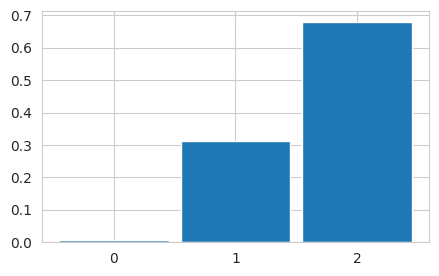

In [56]:
_ = az.plot_dist(test_data.posterior_predictive["out"], kind = "hist")

Still the correct prediction in terms of maximum predictive aposteriori mode is class 2 but we can observe that roughly 30% of our sampled values would opt for class 1!

## Variational Methods

A nice property of MCMC methods is that asymptotically we get valid posterior distributions. The price we pay is time and computational burdens since we may need a long "burn-in" period and multiple chains are typically used to assess convergence.
A possible solution is to dismiss asymptocically correct results and live with an "tolerable" approximation $q_{\phi}$ of the true posterior distribution which typically depends on some parameters $\phi$. Ideally we want to have $q_{\phi}({\bf w})$ close to $p({\bf w} \vert {\mathcal{D}})$, therefore one needs to assess the discrepancy between distributions. One often used distance measure between two distribution $f$ and $g$ is the Kullback-Leibler Divergence:

$$KL(f \vert \vert g) = \mathbb{E}_{f} \left[log \left( \frac{f({\bf x})}{g({\bf x})} \right) \right] =
    \int_{\mathcal{X}} f({\bf x}) \times log \left( \frac{f({\bf x})}{g({\bf x})} \right) d {\bf x}$$

Where expectation is taken with respect to the "target" distribution $f$. Notably the Kullback-Leibler Divergence is non-negative, takes a value of zero if $f$ equals $g$ and is not symmetric (and therefore does not fulfill the definition of a metric).
If the support of the variational distribution does not lie within the support of the posterior distribution one can see that $KL(f \vert \vert g) = \infty$. Therefore minimizing KL divergence needs to take this into account.

Now Consider the following functional:
$$ t(q_{\phi}) = \int_{\mathcal{W}} q_{\phi} \times log \left( \frac{q_{\phi}({\bf w})}{p( {\bf w}, \mathcal{D})} \right) d {\bf w}$$
Rewriting we get:

\begin{align}
    \\ t(q_{\phi}) = \int q_{\phi}({\bf w}) \times log \left( \frac{q_{\phi}({\bf w})}{p( {\bf w}, \mathcal{D})} \right) d {\bf w} 
     & = \int q_{\phi}({\bf w}) \times log \left( \frac{q_{\phi}({\bf w})}{p({\bf w} \vert \mathcal{D}) \times p(\mathcal{D})} \right) d {\bf w} 
    \\ & = \int q_{\phi}({\bf w}) \times \left[ log \left( \frac{q_{\phi}({\bf w})}{p({\bf w} \vert \mathcal{D})}\right) - log (p(\mathcal{D})) \right]d {\bf w} 
    \\ & = \int q_{\phi}({\bf w}) \times log \left( \frac{q_{\phi}({\bf w})}{p({\bf w} \vert \mathcal{D})} \right) d {\bf w}  -log(p(\mathcal{D})) \times \underbrace{\int q_{\phi}({\bf w}) d {\bf w}}_{=1}
    \\ & = KL(q_{\phi} \vert \vert p) - log(\underbrace{p(\mathcal{D})}_{\text{evidence}})
\end{align}

Where we used the fact that densities integrate to one  next to the product rule for probabilities as well as logarithm rules.
One can see that the  negative log-evedince term is an upper bound on the functional $t(q_{\phi})$ since $KL(q_{\phi} \vert \vert p) \geq 0$  and 
$t(q_{\phi}) = KL(q_{\phi} \vert \vert p) - log(p(\mathcal{D})) \Rightarrow ELBO \leq  log(p(\mathcal{D}))$ where ELBO is an abbreviation for *Evidence Lower Bound*, a common name for  $-t(q_{\phi})$ .
Therefore instead of minimizing Kullback-Leibler Divergence one can also maximize $ELBO$ (as $p(\mathcal{D})$ does not vary for given data).

Now let us reset the model to the original training data and fit an approximation of the actual distributon.<br>
By default PyMc uses a mean field approximation, a mixture of gaussian distributions.

In [57]:
with bnn_wine:
    pm.set_data({"ann_input": X_train_wine, "ann_output": y_train_wine},
                coords = {"obs_id": np.arange(X_train_wine.shape[0])})
    approx = pm.fit(n = 10_000)

Output()

Finished [100%]: Average Loss = 3,245.4


To check, whether we approximated the original target let us plot the approimation loss in terms of negative ELBO:

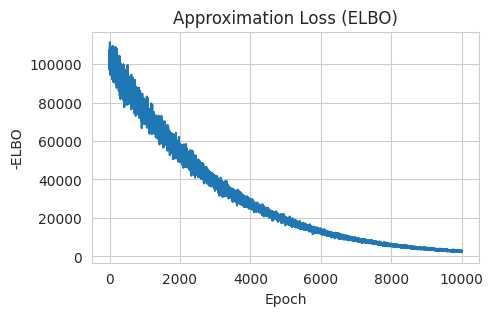

In [58]:
_ = plt.plot(approx.hist)
plt.title("Approximation Loss (ELBO)")
plt.ylabel("-ELBO")
plt.xlabel("Epoch")
plt.show()

In [59]:
with bnn_wine:
    new_trace = approx.sample(draws = 500)

Now a small check whether we captured the original data distribution, just as above:

In [60]:
with bnn_wine:
    ppc_new = pm.sample_posterior_predictive(new_trace)
    new_trace.extend(ppc)

Sampling: [out]


Output()

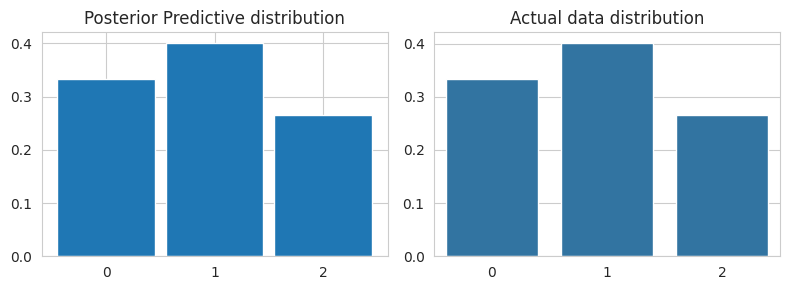

In [61]:
fig, ax = plt.subplots(1,2, figsize=(8, 3))
az.plot_dist(new_trace.posterior_predictive["out"], kind = "hist", ax = ax[0])
ax[0].set_title("Posterior Predictive distribution")
_, counts = np.unique(y_train_wine, return_counts = True)
counts = counts / sum(counts)
sns.barplot(counts, ax = ax[1])
ax[1].set_title("Actual data distribution")
plt.tight_layout()
plt.show()

Again we update the model with new data an create an artifical test case:

In [62]:
test = 0.5 * X_train_wine[0] + 0.5 * X_test_wine

In [63]:
with bnn_wine:
    pm.set_data({"ann_input": test, "ann_output": y_test_wine},
                coords = {"obs_id": np.arange(X_test_wine.shape[0])})
    new_test_data = pm.sample_posterior_predictive(new_trace)

Sampling: [out]


Output()

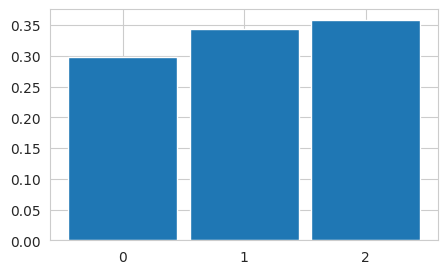

In [64]:
_ = az.plot_dist(new_test_data.posterior_predictive["out"], kind = "hist")

The single best predicted class would still be class 2 but observe that we are facing much higher epistemic uncertainty. Class 0 and class 1 are not very unlikely anymore. In fact one could argue that no class is an obvious choice at all since all have roughly same estimated posterior predictive probability.